<a href="https://colab.research.google.com/github/Wpompeo/Wpompeo_DataScience/blob/master/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="%" src="https://www.omnieventos.com/wp-content/uploads/2019/05/1-Santiago-Chile-t.jpg">

#### **Data Science na Prática 2.0 - projeto 1**
*by [Wagner Pompeo Corrêa](https://github.com/Wpompeo)*

---

# Análise dos Dados do Airbnb - *Santiago, Chile*

O [Airbnb](https://www.airbnb.com.br/) É uma plataforma de aluguel de imóveis que possibilita que o proprietário alugue sua casa/apartamento ou até mesmo um único quarto de maneira rápida e prática.

Fundada em 2008 já é considerada como sendo a **maior rede hoteleira da atualidade**. Ah, e um pequeno detalhe, **não possui nenhum hotel**

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Santiago, capital do Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui formam obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado o seguinte arquivo:

*`listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2020-12-24/visualisations/listings.csv")


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,71871,5,0,NaN,NaN,1,0
1,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,30000,7,8,2020-12-05,0.19,1,354
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,39529,1,0,NaN,NaN,1,0
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,38092,3,0,NaN,NaN,2,178
4,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,38810,1,45,2019-10-11,0.37,3,357


In [19]:
# formata valores float
pd.set_option('display.float_format',lambda x:'%.3f'% x)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso arquivo **.csv** possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é uma versão "resumida" do Airbnb, o que já é o suficiente para uma primeira análise. Na mesma página que baixamos o arquivo. Há uma versão mais completa com maior números de dados de entradas e variáveis.



In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11806
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Analisando nosso *dataset*:

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [21]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group              1.000
reviews_per_month                0.423
last_review                      0.423
name                             0.001
host_name                        0.000
availability_365                 0.000
calculated_host_listings_count   0.000
number_of_reviews                0.000
minimum_nights                   0.000
price                            0.000
room_type                        0.000
longitude                        0.000
latitude                         0.000
neighbourhood                    0.000
host_id                          0.000
id                               0.000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para uma melhor visualição, irei plotar o histograma.

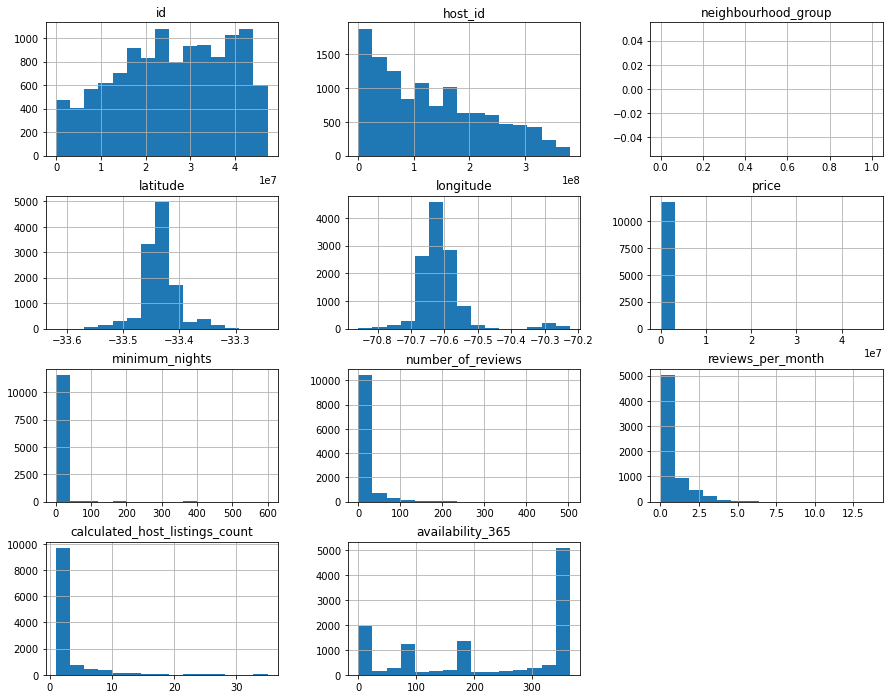

In [22]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,12));

### **Q4. Há *outliers* presentes?**


Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [25]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11806.000,11806.000,11806.000,6815.000,11806.000,11806.000
mean,65649.465,6.090,13.421,0.755,2.691,225.126
std,703337.551,23.464,32.520,1.099,3.888,143.331
min,0.000,1.000,0.000,0.010,1.000,0.000
25%,18000.000,1.000,0.000,0.090,1.000,89.000
50%,28748.000,2.000,1.000,0.310,1.000,269.000
75%,43123.000,3.000,10.000,0.990,2.000,364.000
max,46716198.000,600.000,503.000,13.730,35.000,365.000


Analisando o resultado estatístico acima, percebemos algumas discrepâncias em algumas colunas.

* A variável `price` possui 75% do seu valor abaixo de 43123.000, porém seu valor máximo é de 46716198.000. Os valores estão em *peso chileno* que no momento da nossa análise vale: **R$0,0073** em conversão para a moeda `Brasileira`.

* A quantidade mínima de noites `minimum_nights` está acima de 365 dias no ano.


### Boxplot para minimum_nights


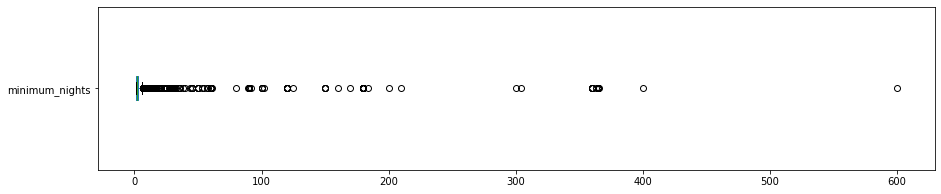

minimum_nights: valores acima de 30:
236 entradas
1.9990%


In [27]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30]) / df.shape[0])*100))

### Boxplot para price

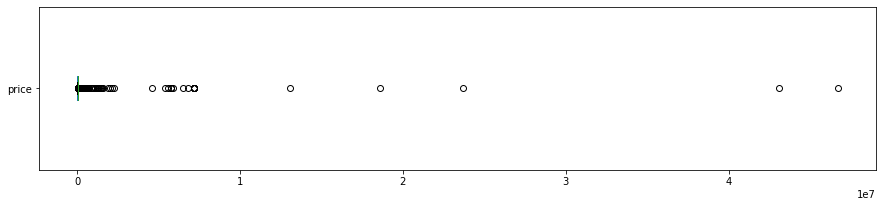


price: valores acima de 206393.83 
340 entradas
2.8799%


In [28]:
# price
df.price.plot(kind= 'box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 206393.83 para price
print("\nprice: valores acima de 206393.83 ")
print("{} entradas".format(len(df[df.price > 206393.83])))
print("{:.4f}%".format((len(df[df.price > 206393.83]) / df.shape[0]) * 100))

### Histogramas sem *outliers*

Já conseguimos identificar **outliers** nas variáveis `price` e `minimum_nights`, agora vamos limpar o *DataFrame* delas e plotar novamente o histograma. 

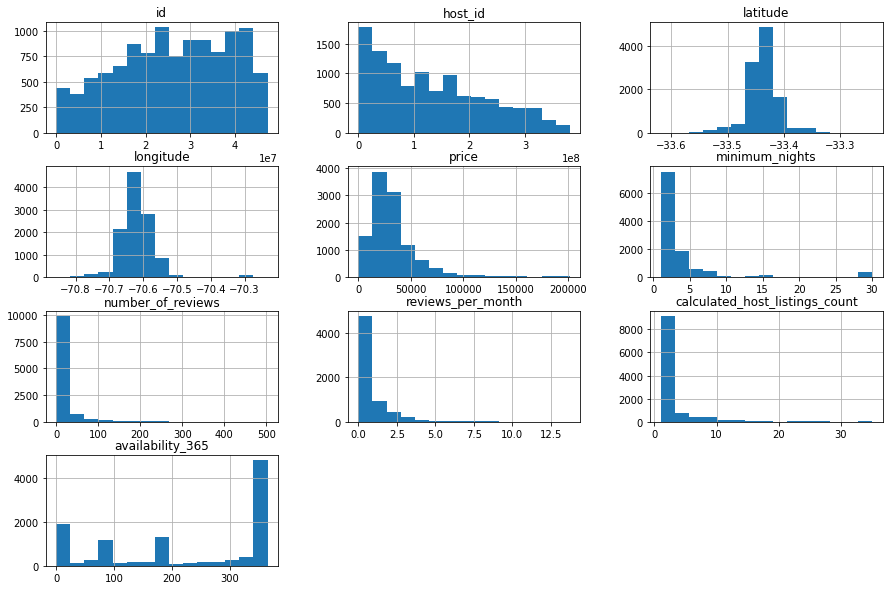

In [29]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 206393.83].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função de coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlções existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn

In [30]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000,-0.032,-0.027,-0.054,0.090,0.055
minimum_nights,-0.032,1.000,0.031,-0.020,-0.030,-0.006
number_of_reviews,-0.027,0.031,1.000,0.763,0.037,0.003
reviews_per_month,-0.054,-0.020,0.763,1.000,0.090,-0.011
calculated_host_listings_count,0.090,-0.030,0.037,0.090,1.000,0.135
availability_365,0.055,-0.006,0.003,-0.011,0.135,1.000


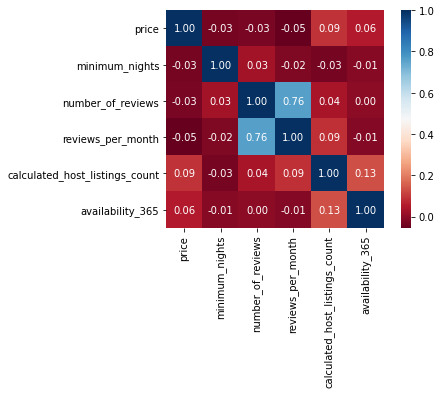

In [31]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado em Santiago pelo Airbnb?**

In [32]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5719
Private room       5121
Shared room         269
Hotel room          135
Name: room_type, dtype: int64

In [33]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt   0.509
Private room      0.455
Shared room       0.024
Hotel room        0.012
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Santiago?**

Podemos verificar a região mais cara, usando a função `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [34]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea   103626.861
Vitacura        47359.707
Pudahuel        44724.342
Las Condes      42563.089
Quilicura       40801.447
Providencia     35723.258
La Pintana      35000.000
Huechuraba      34226.109
Recoleta        32311.697
Peñalolén       31988.100
Name: price, dtype: float64

Acima, vemos que o *elegante* e extenso súburbio de **Lo Barnechada** possui a média de preço mais alta.
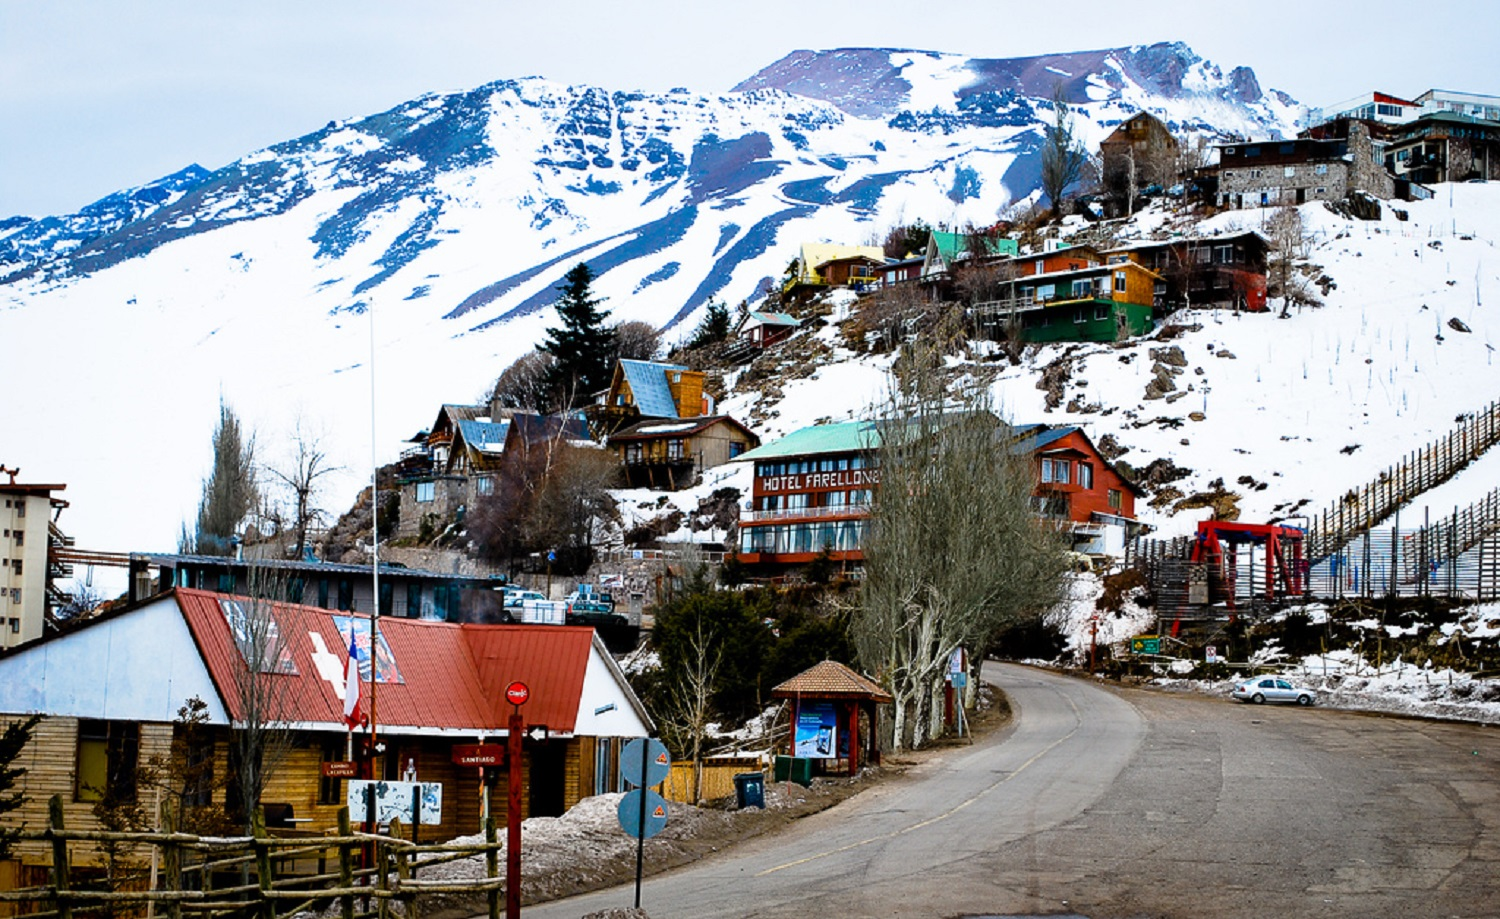



In [50]:
# ver quantidade de imóveis no bairro Lo Barnechea
print(df_clean[df_clean.neighbourhood == "Lo Barnechea"].shape)

(266, 15)


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=`longitude`e y=`latitude`.

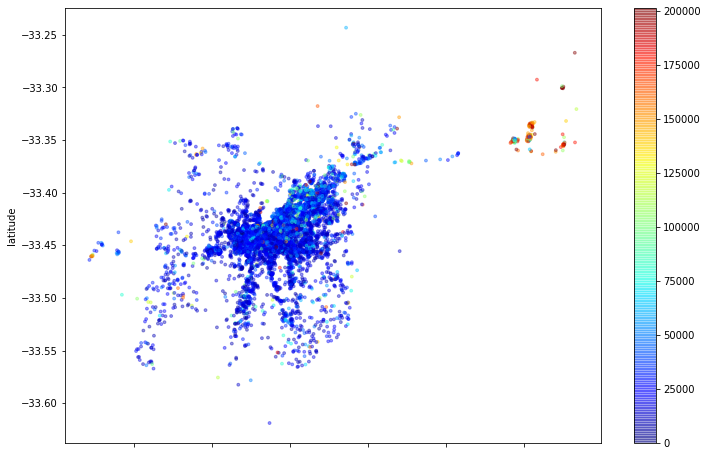

In [42]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'),figsize=(12,8))

## Conclusões


Foi realizada uma pequena análise superficial com base nos dados do Airbnb, mesmo assim conseguimos visualizar alguns *outliers* em variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode causar distorções nas informações estatísticas.

Por fim, vale lembrar que este *dataset* é uma versão resumida, idela para iniciarmos uma abordagem inicial. Para uma próxima análise exploratória, devemos utilizar o conjunto de dados mais completo.